# Diabetes Prediction using Supervised Learning

# 🩺 Diabetes Prediction using Supervised Learning


This notebook builds a supervised machine learning model to predict whether a patient is diabetic or not, based on medical features from the Pima Indians Diabetes dataset.


### *Importing Libraries*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

### Visualizing dataset

Dataset Shape: (768, 9)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Class Distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64

Statistical Summary:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000 

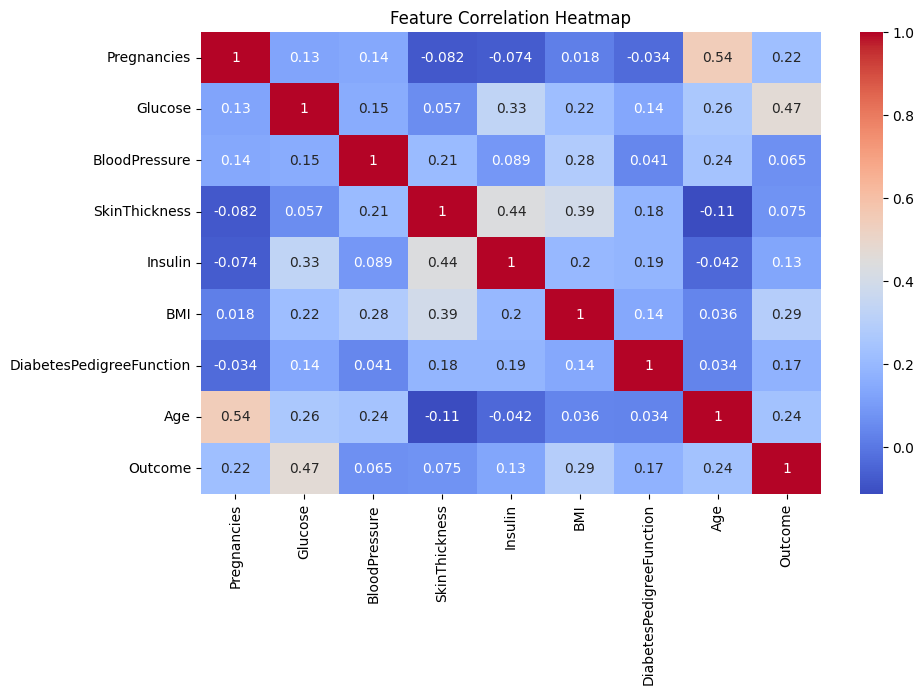

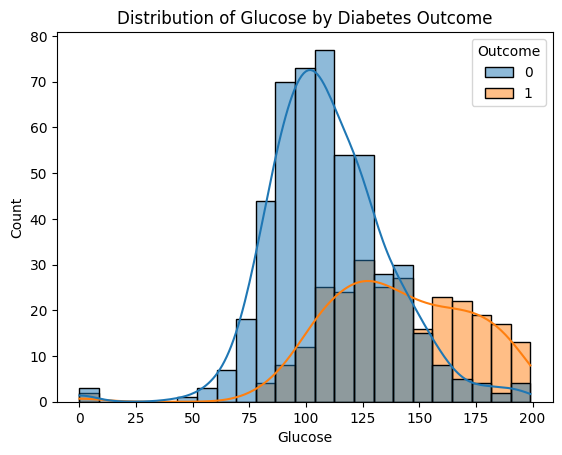

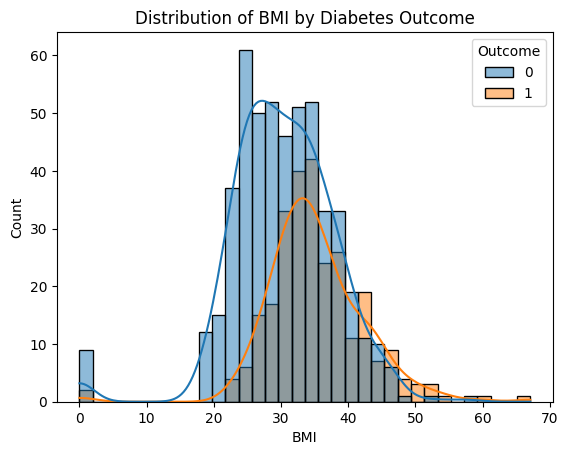

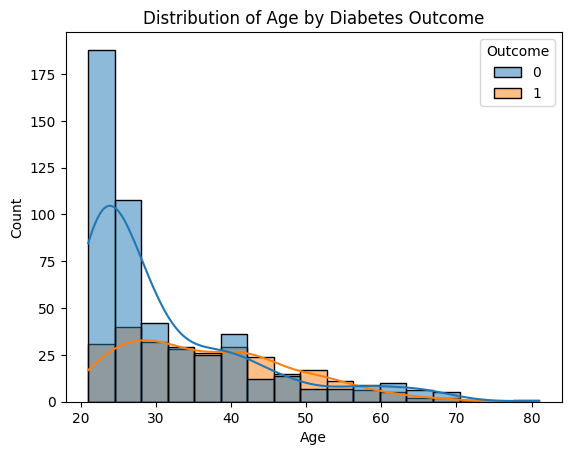

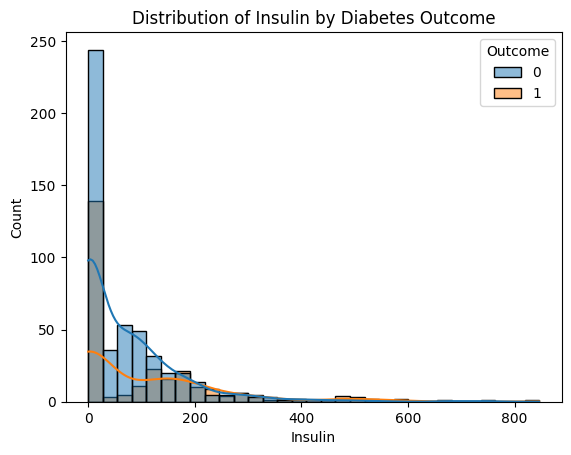

In [5]:

df = pd.read_csv('diabetes.csv')

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Outcome'].value_counts())
print("\nStatistical Summary:\n", df.describe())

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

features = ['Glucose', 'BMI', 'Age', 'Insulin']
for feature in features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True)
    plt.title(f"Distribution of {feature} by Diabetes Outcome")
    plt.show()

### Scaling

In [6]:

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


Models Comparison

In [7]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = {"Accuracy": accuracy, "AUC": auc}
    print(f"\n{name} Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", auc)


Logistic Regression Evaluation:
Confusion Matrix:
 [[82 18]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

ROC AUC Score: 0.8229629629629629

Random Forest Evaluation:
Confusion Matrix:
 [[85 15]
 [21 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

ROC AUC Score: 0.8228703703703704

Support Vector Machine Evaluation:
Confusion Matrix:
 [[82 18]
 [21 33]]
Classification Repor

###ROC curve for best model

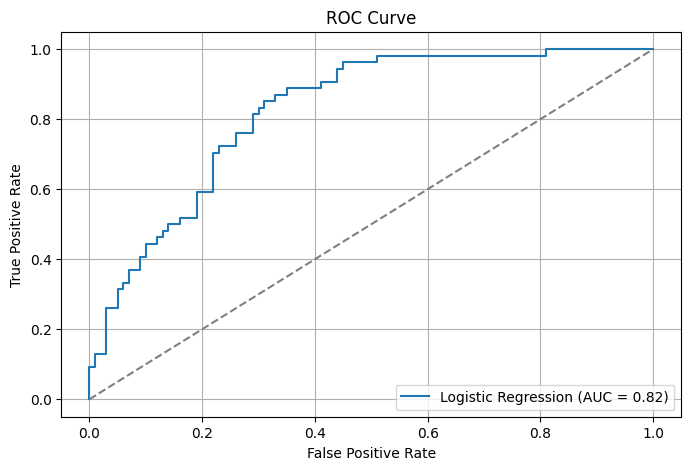

In [8]:

best_model_name = max(results, key=lambda k: results[k]['AUC'])
best_model = models[best_model_name]
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {results[best_model_name]['AUC']:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


###making a prediction model

In [9]:

sample_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Sample patient data
sample_data_scaled = scaler.transform(sample_data)


prediction = best_model.predict(sample_data_scaled)
prediction_prob = best_model.predict_proba(sample_data_scaled)

print("Predicted Class:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")
print("Prediction Probability:", prediction_prob[0][prediction[0]])

Predicted Class: Diabetic
Prediction Probability: 0.7311394615465721


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
